In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:

# Step 1: Load the dataset
df = pd.read_csv('revenue_prediction.csv')  

In [5]:
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [3]:
df.isnull().sum()


Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [7]:
# Step 2: Split the dataset into features and target variable
X = df.drop(['Id', 'Name', 'Revenue'], axis=1)  # Features
y = df['Revenue']  # Target variable

In [10]:
# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 4: Choose a machine learning algorithm
model = RandomForestRegressor(random_state=42)  # Using Random Forest Regressor

In [14]:
# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X, columns=['Franchise', 'Category','City'])

# Now, split the dataset into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Now, train the model
model.fit(X_train, y_train)
# Step 5: Train the model on the training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [15]:
# Step 6: Evaluate the model's performance on the testing data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 216184448023.82062
R-squared: 0.8523589107019662


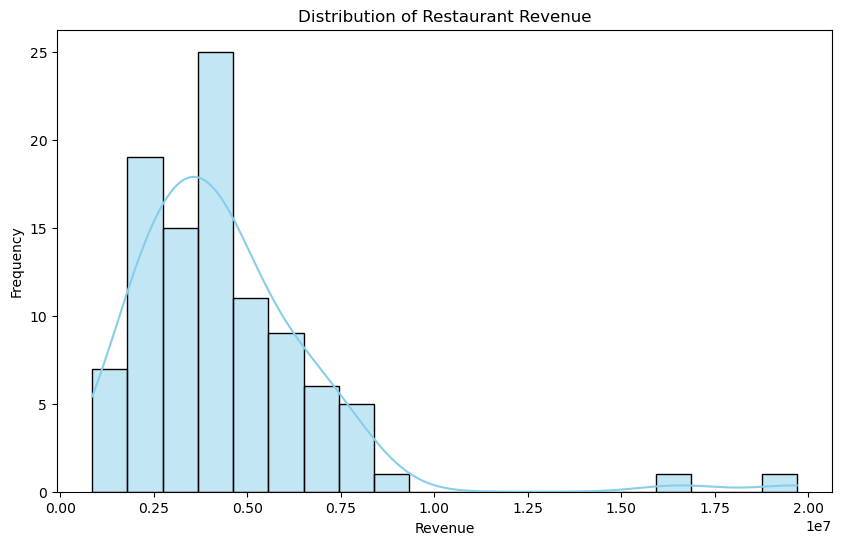

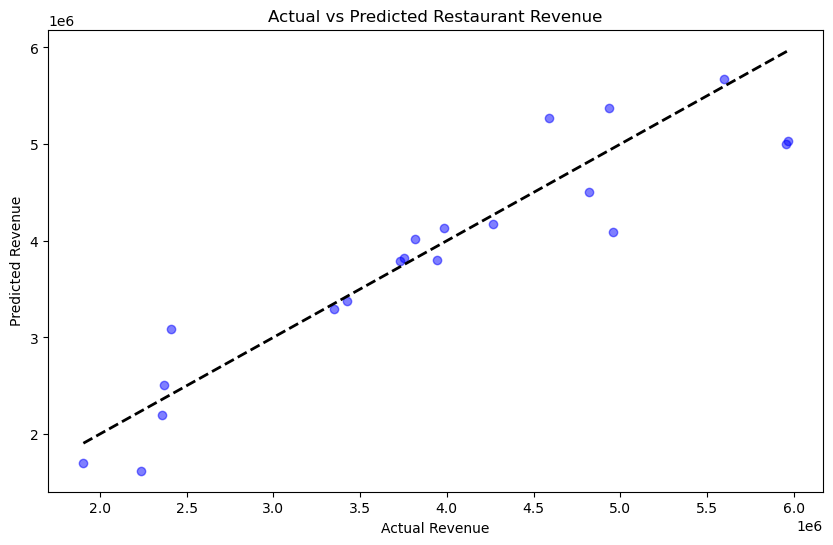

In [18]:
# Distribution of the target variable (revenue)
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

# Comparing actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Restaurant Revenue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.show()